In [1]:
using CSV
using Plots
using DataFrames
using StatsPlots, KernelDensity
using PyCall

In [7]:
surp = pyimport("surp")


PyObject <module 'surp' from '/users/PAS2232/aeyobd/python/surp/__init__.py'>

In [11]:
subgiants = surp.src.analysis.apogee_analysis.subgiants

function pd_to_df(df_pd)
    df= DataFrame()
    for col in df_pd.columns
        df[!, col] = getproperty(df_pd, col).values
    end
    df
end

sg = pd_to_df(subgiants);

In [9]:
mg_h_err(mg_h) = max(0.015,-0.03*mg_h + 0.025) * randn()

c_mg_err(mg_h) = max(0.02, -0.11*mg_h + 0.04) * randn()

mg_fe_err(mg_h) = max(0.01, -0.0225*mg_h+0.02) * randn()

mg_fe_err (generic function with 1 method)

In [28]:
df = CSV.read("../../results/cristallo11_f0.2_Z0.2_eta1.0_v0.1.3.csv", DataFrame);
mg_h = df[:, "MG_H"]

df[:, "MG_H"] .+= mg_h_err.(mg_h)
df[:, "MG_FE"] .+= mg_fe_err.(mg_h)
df[:, "C_MG"] .+= c_mg_err.(mg_h);

[ Info: Saved animation to /users/PAS2232/aeyobd/python/surp/notebooks/vice model analysis/tmp.gif


Plots.AnimatedGif("/users/PAS2232/aeyobd/python/surp/notebooks/vice model analysis/tmp.gif")
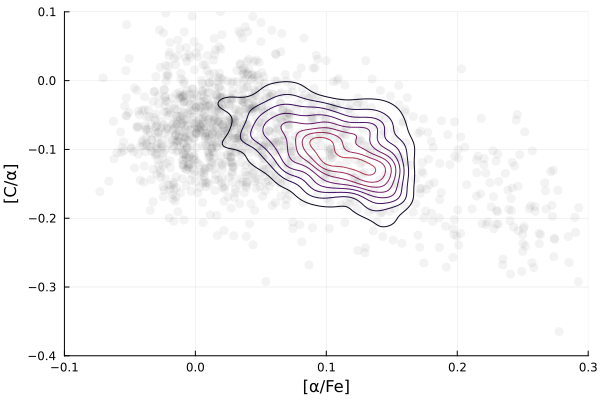

In [29]:
dz = 0.1

anim = @animate for mg_h in -0.2:0.01:0.5
    
    filt = @. mg_h <= sg[:,"MG_H"] < mg_h + dz
    filt .&= (sg[:,"high_alpha"] .!= 1)
    filt .&= isfinite.(sg[:,"C_MG"])
    dens = kde((sg[filt, "MG_FE"], sg[filt, "C_MG"]))
    plot(dens, clim=(0, 175), legend=false)
    
    filt = @. mg_h-dz < df[:,"MG_H"] < mg_h + dz
    if sum(filt) > 1
        scatter!(df[filt, "MG_FE"], df[filt, "C_MG"], ms=5, alpha=0.05, color="black")
    end

    
    
    xlims!(-0.1, 0.3)
    ylims!(-0.4, 0.1)
    xlabel!("[α/Fe]")
    ylabel!("[C/α]")
end

gif(anim, fps=20)